In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ac = pd.read_csv('/content/Machine Learning Coursework.csv')         #load csv file

**DATA EXPLORATION**

In [3]:
ac.head()                             # returns a specified number of rows, string from the top

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [4]:
ac.isna().sum()                                 # detect the presence of NULL or NA values 

id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [5]:
ac.info()                                                  # information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB


In [6]:
ac.describe()                                          #returns description of the data in the DataFrame

,id,Age,HasDrivingLicense,RegionID,Switch,SalesChannelID,DaysSinceCreated,Result
count,304887.000000,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000
mean,190594.098072,38.832561,0.997853,26.408892,0.458281,111.966591,154.272609,0.121970
std,110022.144283,15.504062,0.046281,13.213345,0.498258,54.230069,83.642389,0.327251
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,95342.500000,25.000000,1.000000,15.000000,0.000000,26.000000,82.000000,0.000000
50%,190639.000000,36.000000,1.000000,28.000000,0.000000,131.000000,154.000000,0.000000
75%,285785.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000


In [7]:
ac.isnull().sum()                                       # incrementing by one for each instance of a null value

id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [8]:
ac.isnull().sum() 

id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [9]:
# median = ac["Age"].median() # option 3
# ac["Age"].fillna(median, inplace=True)
# print('After filling missing values of Age\n', ac.isna().sum())

In [10]:
#  # option 3
# ac["Gender"].fillna(value = 'Male', inplace=True)
# print('After filling missing values of Age\n', ac.isna().sum())

In [11]:
#  # option 3
# ac["HasDrivingLicense"].fillna(value = '1', inplace=True)
# print('After filling missing values of Age\n', ac.isna().sum())

In [12]:
# for name in ac.columns:
#   ac[name] = ac[name].fillna(method = 'pad')
# ac = ac.replace({np.nan : 0})
# ac.isnull().sum()

In [13]:
ac.drop_duplicates(inplace=True)          #returns the DataFrame with removed duplicate rows or None

In [14]:
duplicatedValues = ac.duplicated()
duplicatedValues.sum()

0

In [15]:
# # use scatter_matrix of pandas.plotting     https://pandas.pydata.org/docs/reference/plotting.html
# from pandas.plotting import scatter_matrix
# scatter_matrix(df[['VehicleAge', 'RegionID', 'HasDrivingLicense']], figsize=(13, 9))

In [16]:
import seaborn as sns

In [17]:
p_r_ac = pd.DataFrame(ac[ac['Result']==1].groupby(['PastAccident','Result']).size()).reset_index()

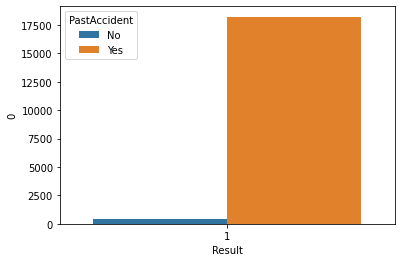

In [18]:
sns.barplot(data=p_r_ac, x="Result", y=0, hue="PastAccident")

In [19]:
p_r_ac = pd.DataFrame(ac[ac['Result']==1].groupby(['VehicleAge','Result']).size()).reset_index()

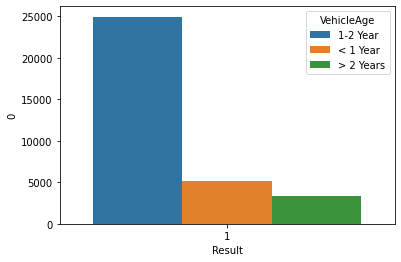

In [20]:
sns.barplot(data=p_r_ac, x="Result", y=0, hue="VehicleAge")

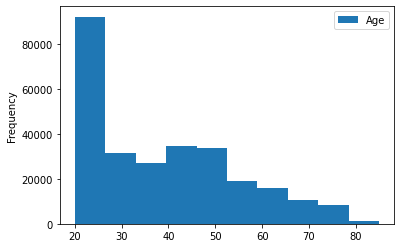

In [21]:
# We can also use plot of pandas DataFrame to plot a pair of features: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
ac.plot(kind='hist', x='Result', y='Age')

                 Age         Result
count  274339.000000  304887.000000
mean       38.832561       0.121970
std        15.504062       0.327251
min        20.000000       0.000000
25%        25.000000       0.000000
50%        36.000000       0.000000
75%        49.000000       0.000000
max        85.000000       1.000000


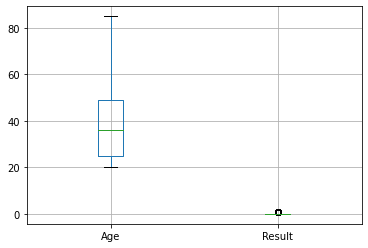

In [22]:
# We demonstrate boxplot for 'Age', 'Fare'. boxplot can visualise the distribution of a feature for outlies removal if needed.

print(ac[['Age', 'Result']].describe())
ac[['Age', 'Result']].boxplot()

                         id       Age  HasDrivingLicense  RegionID    Switch  \
id                 1.000000  0.003069          -0.002220 -0.001230 -0.000159   
Age                0.003069  1.000000          -0.080243  0.042637 -0.257237   
HasDrivingLicense -0.002220 -0.080243           1.000000 -0.002070  0.011623   
RegionID          -0.001230  0.042637          -0.002070  1.000000 -0.018831   
Switch            -0.000159 -0.257237           0.011623 -0.018831  1.000000   
SalesChannelID    -0.003124 -0.576164           0.043844 -0.042514  0.219808   
DaysSinceCreated   0.000209 -0.002235          -0.001453 -0.004254  0.002117   
Result            -0.002525  0.111939           0.009580  0.011969 -0.337895   

                   SalesChannelID  DaysSinceCreated    Result  
id                      -0.003124          0.000209 -0.002525  
Age                     -0.576164         -0.002235  0.111939  
HasDrivingLicense        0.043844         -0.001453  0.009580  
RegionID               

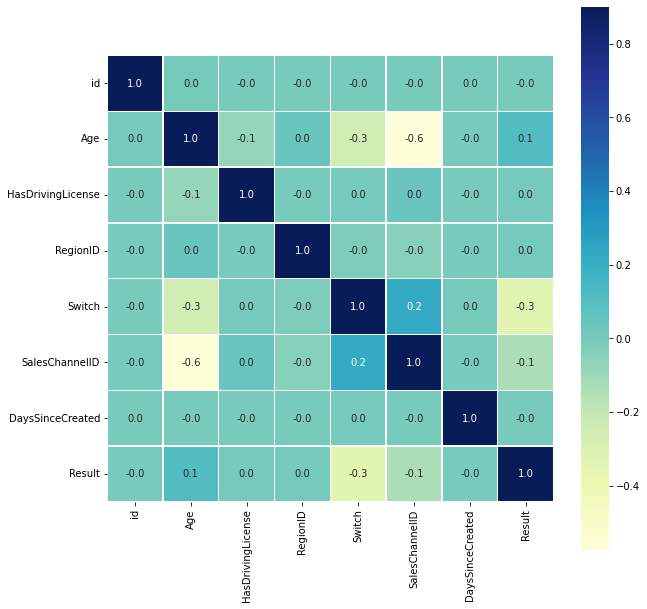

In [23]:
corr_matrix = ac.corr()
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True, linewidths=0.3, cmap="YlGnBu", fmt=".1f")

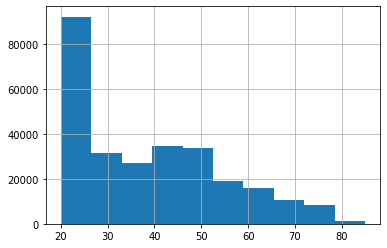

In [24]:
ac['Age'].hist()

**DATA PRE-PROCESSING**

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
ac['AnnualPremium'] = ac['AnnualPremium'].str.replace('£','').str.replace(',','').astype(float)

In [27]:
ac['Switch'] = ac['Switch'].astype('O')

In [28]:
X = ac.iloc[:,1:-1]
Y = ac.iloc[ :, -1:]
from sklearn.model_selection import train_test_split

# 70% of the data for traingin, 30% for test, i.e., test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


In [29]:
X_train.head()

,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated
204019,Male,62.0,1.0,28.0,NaN,1-2 Year,NaN,1958.85,124,199
69711,Male,NaN,NaN,28.0,NaN,1-2 Year,NaN,1981.20,154,102
118065,Male,NaN,1.0,30.0,0.0,NaN,NaN,1415.60,152,36
245041,Female,52.0,1.0,NaN,NaN,1-2 Year,No,1419.30,152,109
127531,Male,NaN,1.0,28.0,NaN,< 1 Year,Yes,1328.15,152,19


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [31]:
X_train['RegionID'].fillna(X_train['RegionID'].mode()[0],inplace = True)
X_test['RegionID'].fillna(X_train['RegionID'].mode()[0],inplace = True)
X_train['SalesChannelID'].fillna(X_train['SalesChannelID'].mode()[0],inplace = True)
X_test['SalesChannelID'].fillna(X_train['SalesChannelID'].mode()[0],inplace = True)

In [32]:
X_train.shape

(213420, 10)

In [33]:
#from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ['Gender', 'VehicleAge', 'PastAccident','Switch']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Age', 'DaysSinceCreated','RegionID','SalesChannelID','AnnualPremium']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [34]:
X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

# np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)
print(X_train_processed.shape)

(213420, 14)


**MODEL IMPLEMENTATION AND PERFORMANCE EVALUATION**

In [35]:
from sklearn import linear_model
logr = linear_model.LogisticRegression() 
logr.fit(X_train_processed,y_train)
y_pred = logr.predict(X_test_processed)
print("Accuracy Using Logistic Regression : ", round(metrics.accuracy_score(y_pred,y_test['Result'].values),2))
print("classification report Using Logistic Regression : \n", metrics.classification_report(y_pred,y_test['Result'].values))
print("Recall Using Logistic Regression : ", round(metrics.recall_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Precision Using Logistic Regression : ", round(metrics.precision_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("F1-Score Using Logistic Regression : ", round(metrics.f1_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Confusion Matrix Using Logistic Regression : ", metrics.confusion_matrix(y_pred,y_test['Result'].values))

Accuracy Using Logistic Regression :  0.88
classification report Using Logistic Regression : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     91467
           1       0.00      0.00      0.00         0

    accuracy                           0.88     91467
   macro avg       0.50      0.44      0.47     91467
weighted avg       1.00      0.88      0.94     91467

Recall Using Logistic Regression :  0.88
Precision Using Logistic Regression :  1.0
F1-Score Using Logistic Regression :  0.94
Confusion Matrix Using Logistic Regression :  [[80311 11156]
 [    0     0]]


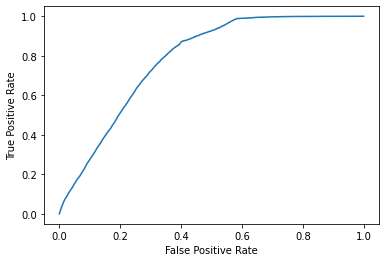

In [36]:
y_pred_proba = logr.predict_proba(X_test_processed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train_processed, y_train)
y_pred = clf.predict(X_test_processed)
print("Accuracy Using KNeighborsClassifier : ", round(metrics.accuracy_score(y_pred,y_test['Result'].values),2))
print("classification report Using KNeighborsClassifier : \n", metrics.classification_report(y_pred,y_test['Result'].values))
print("Recall Using KNeighborsClassifier : ", round(metrics.recall_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Precision Using KNeighborsClassifier : ", round(metrics.precision_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("F1-Score Using KNeighborsClassifier : ", round(metrics.f1_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Confusion Matrix Using KNeighborsClassifier : ", metrics.confusion_matrix(y_pred,y_test['Result'].values))

Accuracy Using KNeighborsClassifier :  0.86
classification report Using KNeighborsClassifier : 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     86752
           1       0.13      0.30      0.18      4715

    accuracy                           0.86     91467
   macro avg       0.54      0.59      0.55     91467
weighted avg       0.92      0.86      0.88     91467

Recall Using KNeighborsClassifier :  0.86
Precision Using KNeighborsClassifier :  0.92
F1-Score Using KNeighborsClassifier :  0.88
Confusion Matrix Using KNeighborsClassifier :  [[76992  9760]
 [ 3319  1396]]


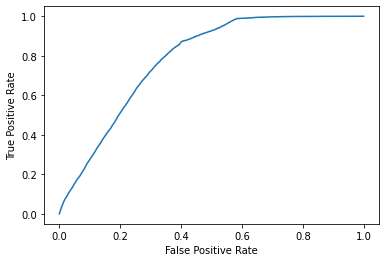

In [38]:
y_pred_clf = clf.predict_proba(X_test_processed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train_processed,y_train)
y_pred = clf.predict(X_test_processed)
print("Accuracy Using RandomForestClassifier : ", round(metrics.accuracy_score(y_pred,y_test['Result'].values),2))
print("classification report Using RandomForestClassifier : \n", metrics.classification_report(y_pred,y_test['Result'].values))
print("Recall Using RandomForestClassifier : ", round(metrics.recall_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Precision Using RandomForestClassifier : ", round(metrics.precision_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("F1-Score Using RandomForestClassifier : ", round(metrics.f1_score(y_pred,y_test['Result'].values,average = 'weighted'),2))
print("Confusion Matrix Using RandomForestClassifier : ", metrics.confusion_matrix(y_pred,y_test['Result'].values))

Accuracy Using RandomForestClassifier :  0.88
classification report Using RandomForestClassifier : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     91467
           1       0.00      0.00      0.00         0

    accuracy                           0.88     91467
   macro avg       0.50      0.44      0.47     91467
weighted avg       1.00      0.88      0.94     91467

Recall Using RandomForestClassifier :  0.88
Precision Using RandomForestClassifier :  1.0
F1-Score Using RandomForestClassifier :  0.94
Confusion Matrix Using RandomForestClassifier :  [[80311 11156]
 [    0     0]]


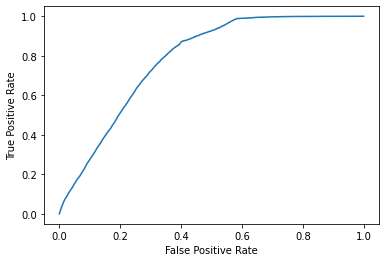

In [40]:
y_pred_clf = clf.predict_proba(X_test_processed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()